In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/u

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [4]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [19]:
#Saving the seqlets

extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))

In [5]:
!ls

copy_data.py			   runme.sh
extracted_contrib_scores.npy	   sparserun_l6g2m0_results.hdf5
extracted_hypothetical_scores.npy  sparserun_results.hdf5
extracted_onehot.npy		   subsample_data.py
myrun_results.hdf5		   trial1.deeplift.imp_score.h5
presparserun_l8g3m2_results.hdf5   trial1.modisco.h5
presparserun_results.hdf5	   TryBpNet.ipynb


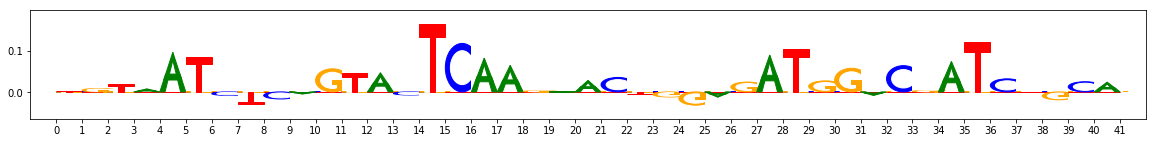

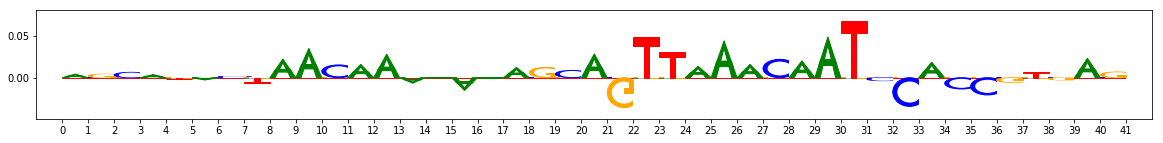

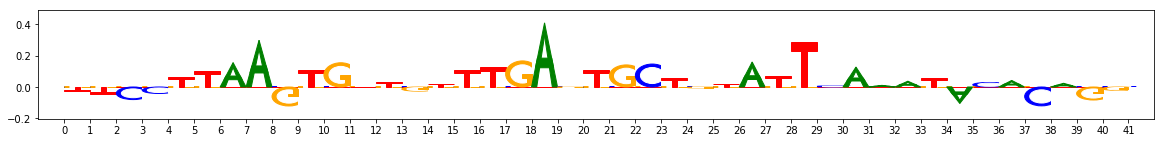

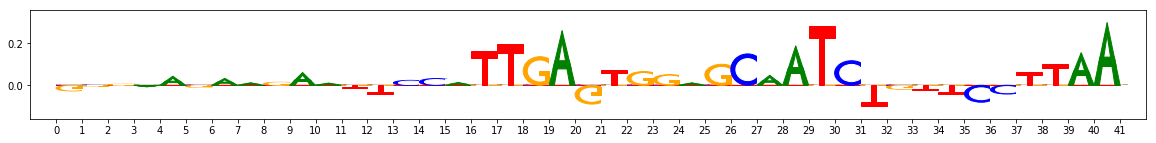

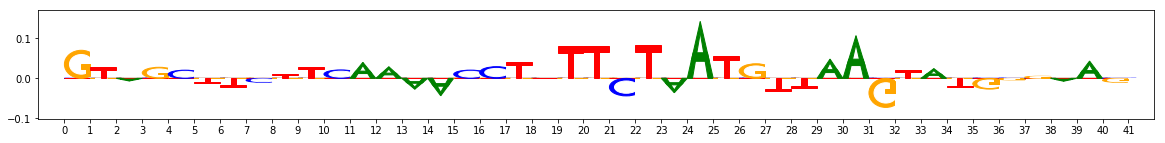

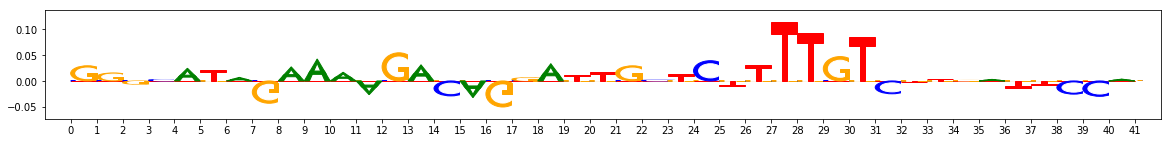

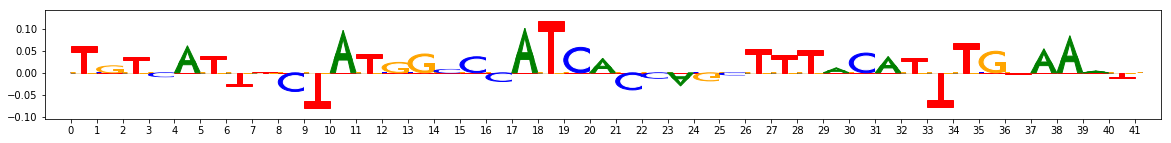

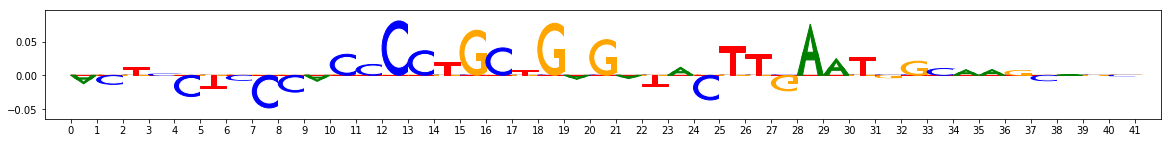

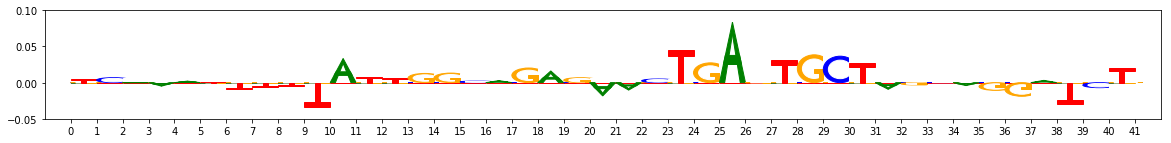

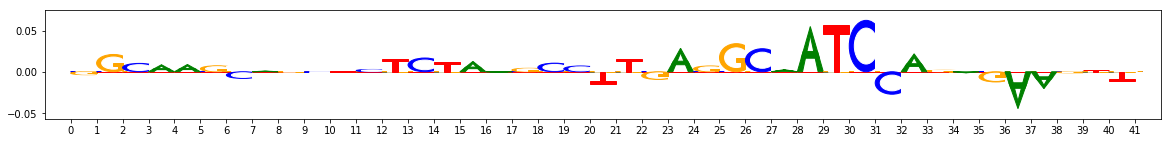

In [9]:
for i in range(10):
    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

pattern idx 0
4011


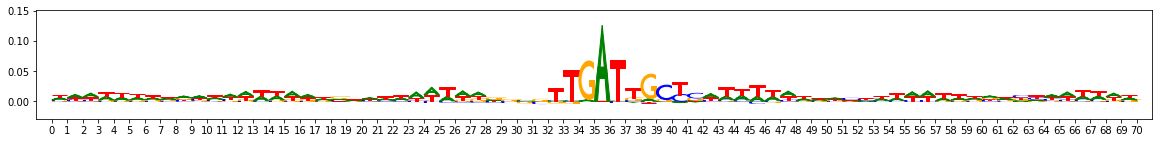

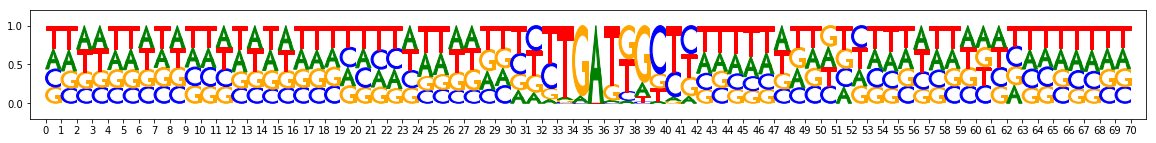

pattern idx 1
2215


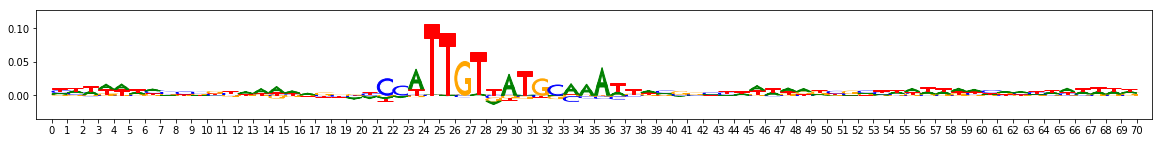

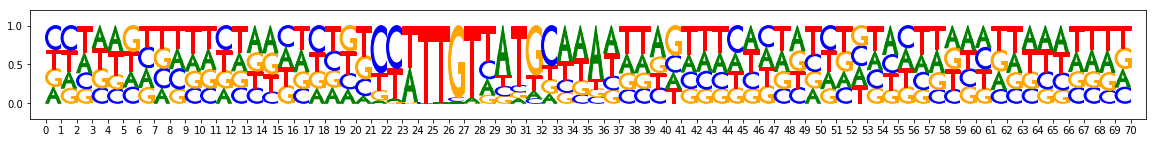

pattern idx 2
1854


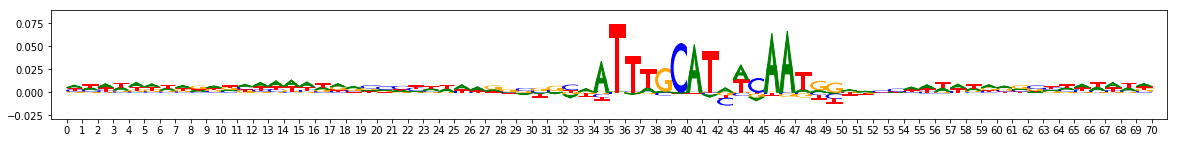

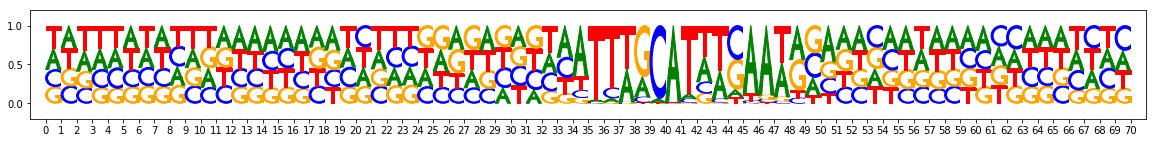

pattern idx 3
1636


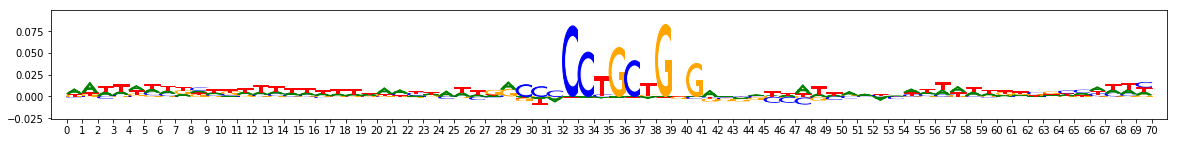

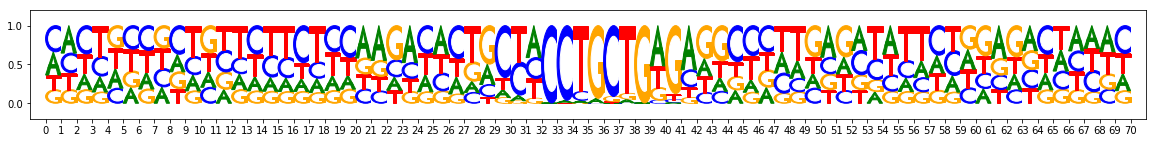

pattern idx 4
937


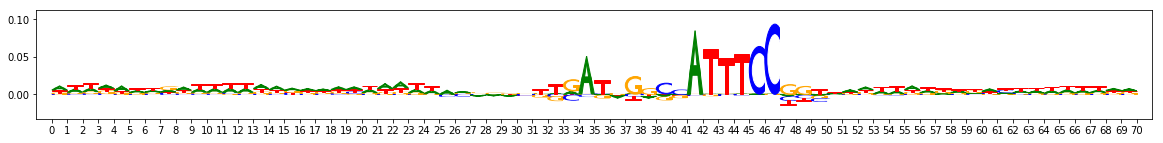

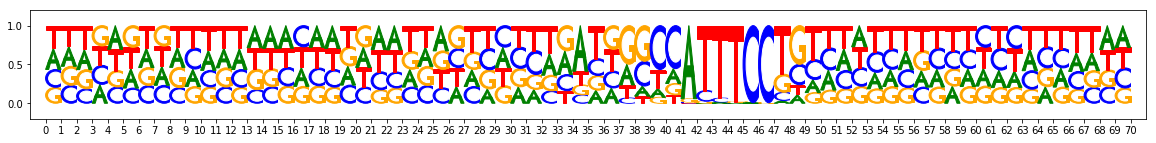

pattern idx 5
749


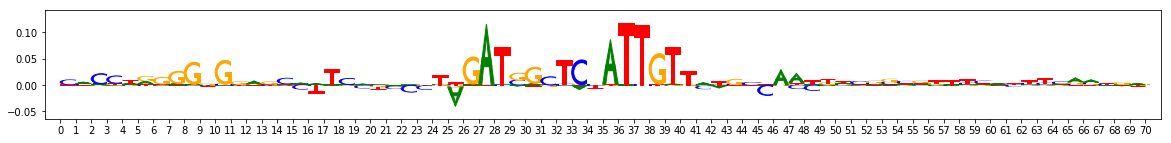

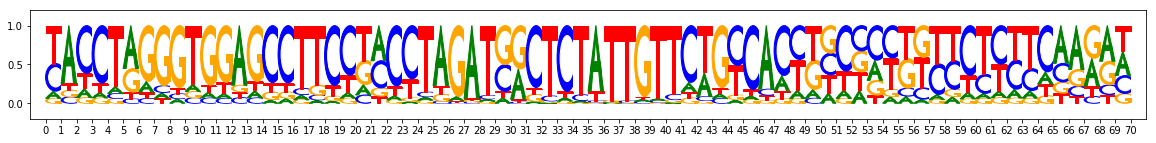

pattern idx 6
466


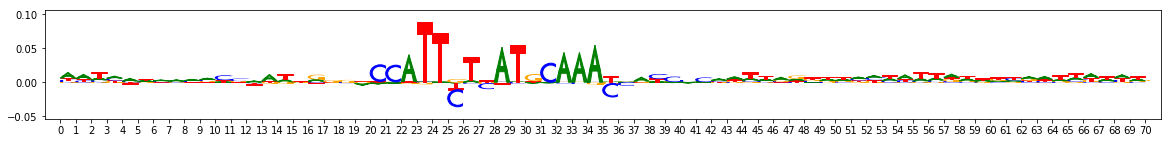

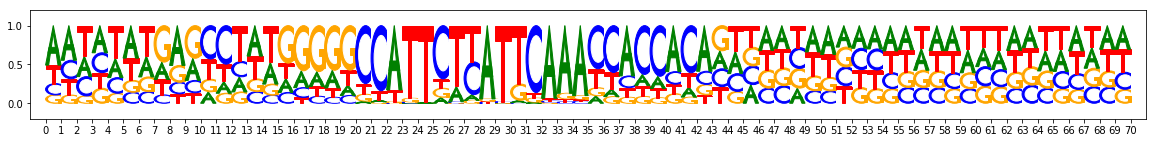

pattern idx 7
231


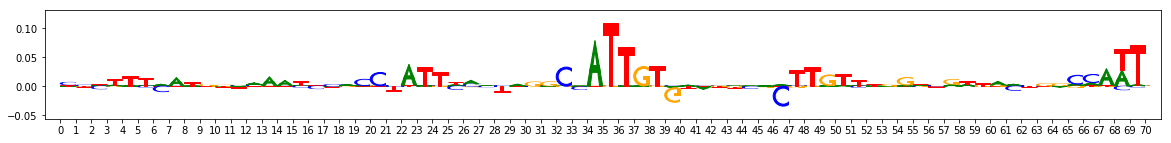

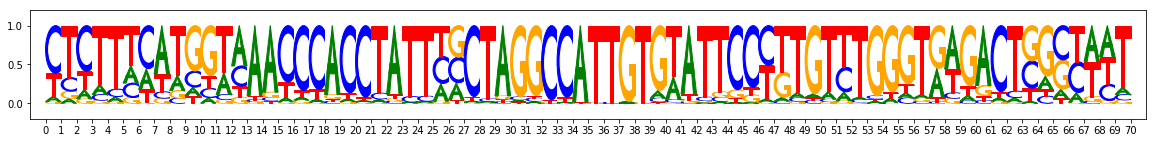

pattern idx 8
191


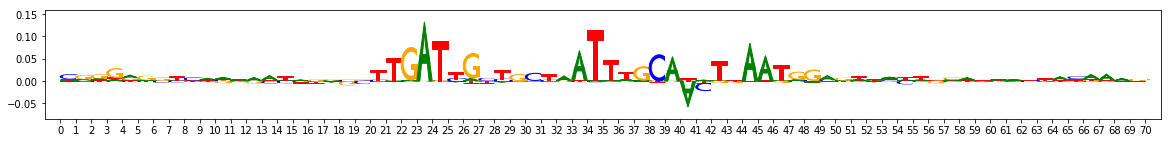

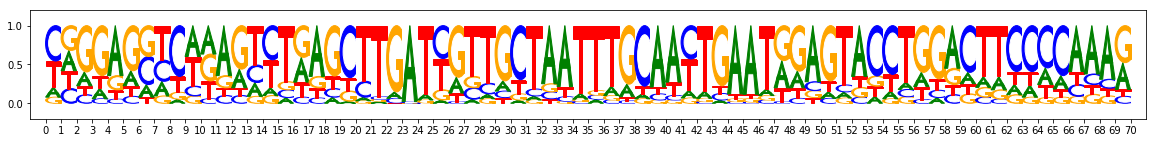

pattern idx 9
187


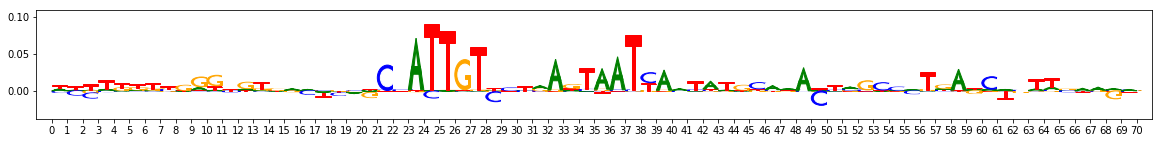

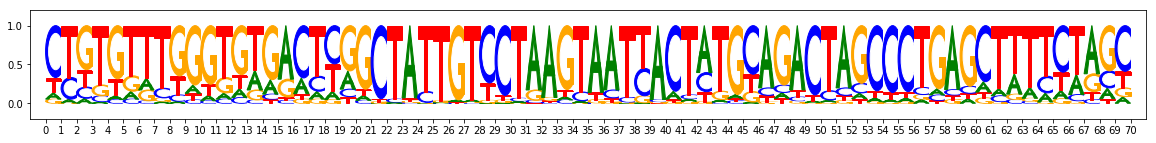

pattern idx 10
142


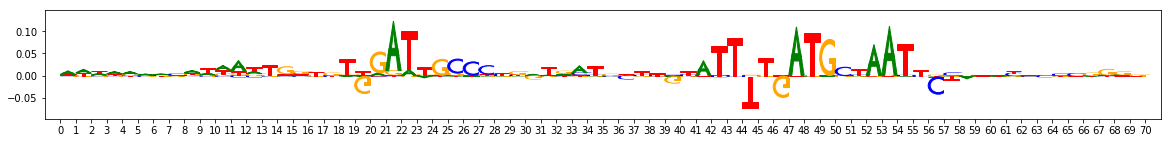

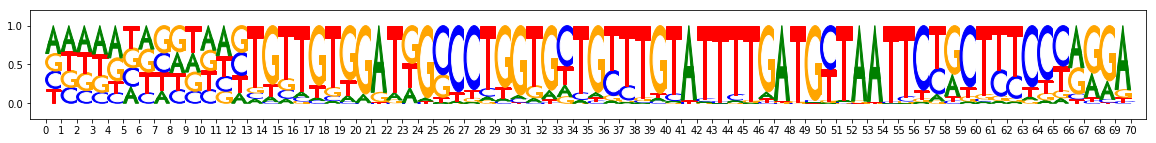

pattern idx 11
117


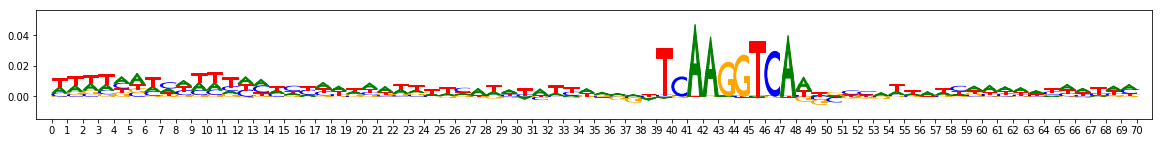

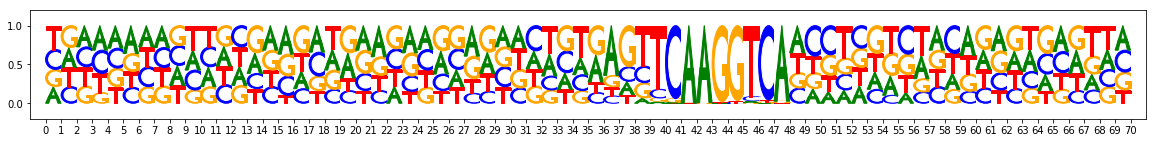

pattern idx 12
89


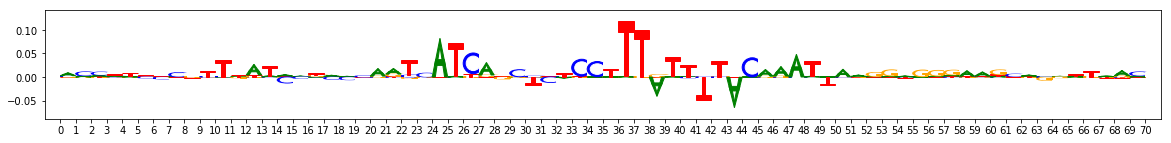

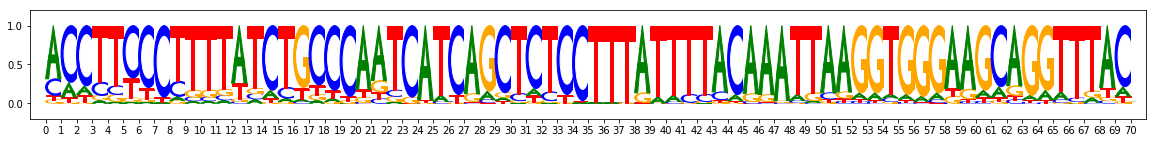

pattern idx 13
105


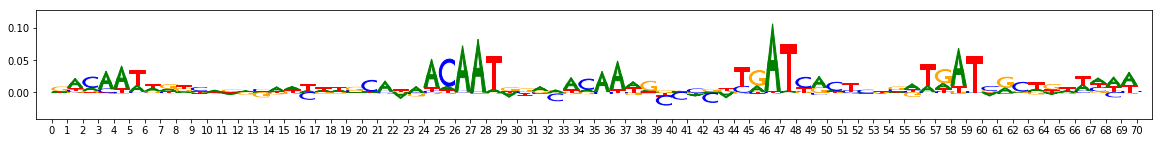

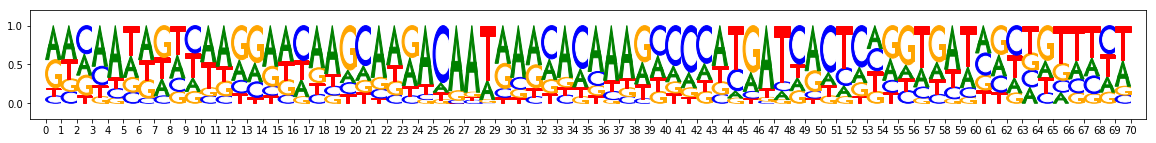

pattern idx 14
105


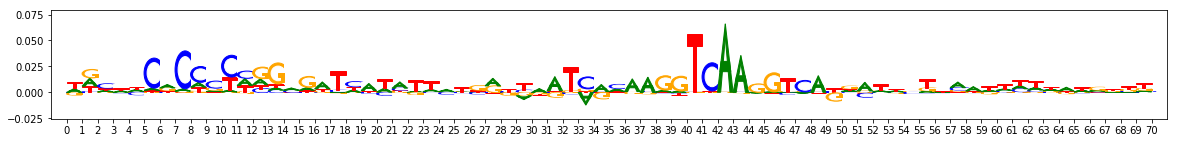

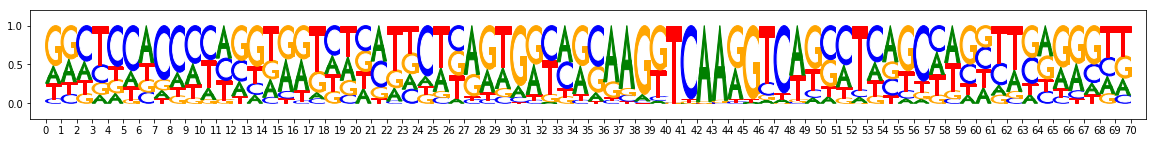

pattern idx 15
65


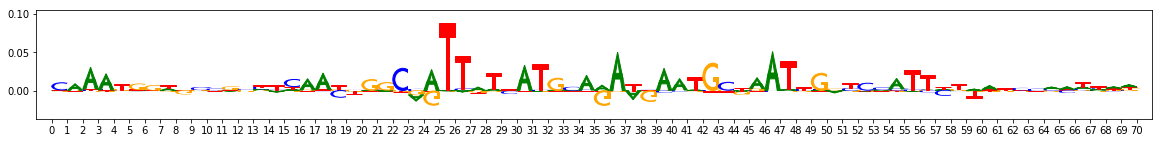

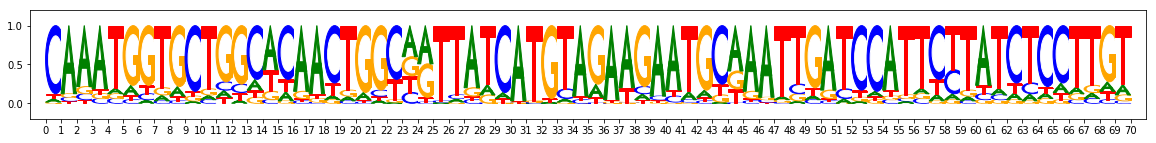

In [3]:
#visualize the patterns:
%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)

/mnt/lab_data2/avanti/tfmodisco
commit 0975f52344f94cfd735f90ea949e88dc75c10c1d (HEAD -> master, origin/master, origin/HEAD)
Merge: 7cb3a20 4a58b09
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Tue Mar 31 22:10:53 2020 -0700

    Merge pull request #56 from kundajelab/plot_save_file_directory
    
    Ability to specify a plot save directory
/mnt/lab_data2/avanti/tfmodisco_bio_experiments
MEMORY 4.390121472
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Thresholds from null dist were -0.026598811149597168  and  0.2509317398071289
Passing windows frac was 0.04676685078463518 , which is above  0.03 ; adjusting
Final raw thresholds are -0.3184376752376554  and  0.3184376752376554
Final transformed thresholds are -0.9699999852203116  and  0.9699999852203116


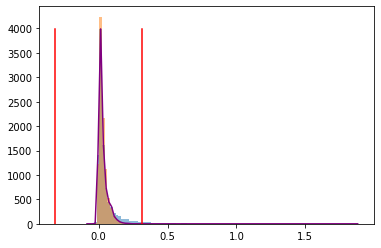

Got 98300 coords
After resolving overlaps, got 98300 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9698999852203116
MEMORY 6.351437824
98300 identified in total
1 activity patterns with support >= 2000 out of 3 possible patterns
Metacluster sizes:  [98297]
Idx to activities:  {0: '1'}
MEMORY 6.35195392
On metacluster 0
Metacluster size 98297 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)

TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 6.353866752
Beginning embedding computation
Computing embeddings
MAKING A SESSION


Finished embedding computation in 22.95 s
Starting affinity matrix computations
Normalization computed in 4.14 s
Cosine similarity mat computed in 316.66 s
Normalization computed in 4.12 s
Cosine similarity mat computed in 247.06 s
Finished affinity matrix computations in 634.71 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 17.31562

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   19.2s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   20.8s finished


Louvain completed 200 runs in 311.86851692199707 seconds
Wrote graph to binary file in 112.1838812828064 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.786847
After 3 runs, maximum modularity is Q = 0.786849
After 4 runs, maximum modularity is Q = 0.788253
After 5 runs, maximum modularity is Q = 0.790053
After 23 runs, maximum modularity is Q = 0.790901
After 41 runs, maximum modularity is Q = 0.791077
After 46 runs, maximum modularity is Q = 0.792669
Louvain completed 96 runs in 411.78184700012207 seconds
Preproc + Louvain took 856.7780199050903 s
Got 25 clusters after round 1
Counts:
{5: 1721, 7: 1333, 10: 691, 2: 1947, 3: 1901, 6: 1374, 11: 679, 9: 700, 17: 155, 1: 2310, 0: 3551, 4: 1857, 18: 125, 15: 363, 16: 362, 8: 729, 20: 90, 14: 364, 13: 407, 22: 74, 19: 95, 12: 431, 21: 82, 23: 58, 24: 46}
MEMORY 18.002542592
(Round 1) Aggregating seqlets in each cluster
MEMORY 18.002542592
Aggregating for cluster 0 with 3551 seqlets
MEMORY 18.002542

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   14.1s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:   15.0s finished


Louvain completed 200 runs in 170.49367547035217 seconds
Wrote graph to binary file in 93.63204264640808 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.749226
After 2 runs, maximum modularity is Q = 0.749437
After 8 runs, maximum modularity is Q = 0.751736
After 10 runs, maximum modularity is Q = 0.761559
After 13 runs, maximum modularity is Q = 0.763779
Louvain completed 63 runs in 266.3359799385071 seconds
Preproc + Louvain took 547.6805634498596 s
Got 26 clusters after round 2
Counts:
{7: 819, 5: 1364, 2: 2211, 1: 2767, 0: 4186, 9: 493, 3: 1793, 8: 667, 17: 133, 4: 1672, 19: 131, 18: 131, 23: 66, 13: 247, 6: 1211, 10: 352, 22: 93, 14: 209, 16: 133, 11: 319, 21: 95, 12: 316, 15: 169, 25: 27, 24: 30, 20: 110}
MEMORY 9.348345856
(Round 2) Aggregating seqlets in each cluster
MEMORY 9.348345856
Aggregating for cluster 0 with 4186 seqlets
MEMORY 9.347035136
Trimmed 109 out of 4186
Skipped 3 seqlets
Aggregating for cluster 1 with 2767 seqlets
MEMO

Inspecting for spurious merging
Wrote graph to binary file in 0.013443708419799805 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0146353
After 4 runs, maximum modularity is Q = 0.0146354
Louvain completed 24 runs in 5.572275876998901 seconds
Similarity is -0.008068908; is_dissimilar is True
Got 4 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 0.15055537223815918 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0289985
After 2 runs, maximum modularity is Q = 0.0305488
Louvain completed 22 runs in 5.604480028152466 seconds
Similarity is 0.18979838; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.2767918109893799 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0250007
After 2 runs, maximum modularity is Q = 0.0326634
Louvain completed 22 runs in 5.303282737731934 seconds
Similarity is 0.49957186; is_

In [6]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

%matplotlib inline

workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        trim_to_window_size=30,
        initial_flank_to_add=10,
        kmer_len=6,
        num_gaps=2,
        num_mismatches=0,
        n_cores=10,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [7]:
import h5py
import modisco.util
reload(modisco.util)
!rm commit0975f52_l6g2m0_results.hdf5
grp = h5py.File("commit0975f52_l6g2m0_results.hdf5","r+")
results.save_hdf5(grp)
grp.close()

rm: cannot remove 'commit0975f52_l6g2m0_results.hdf5': No such file or directory


/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """


metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 5276
Task 0 hypothetical scores:


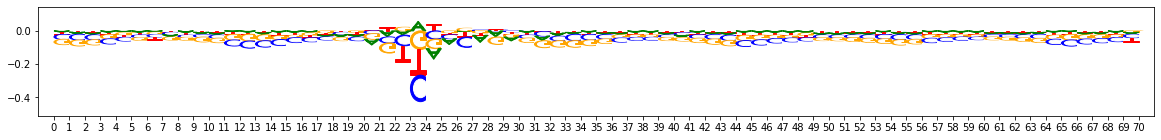

Task 0 actual importance scores:


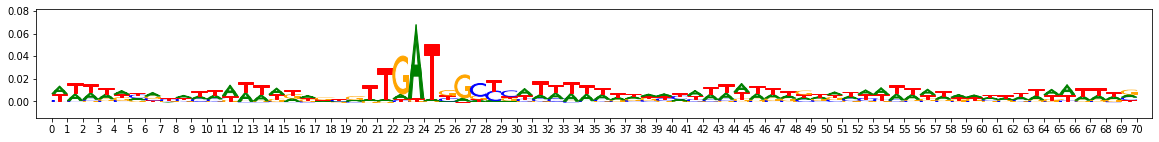

onehot, fwd and rev:


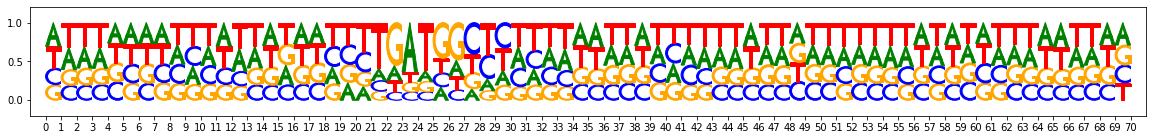

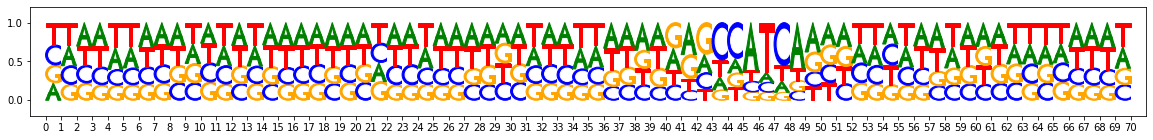

metacluster_0 pattern_1
total seqlets: 4799
Task 0 hypothetical scores:


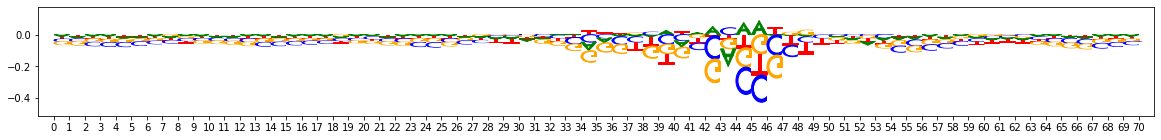

Task 0 actual importance scores:


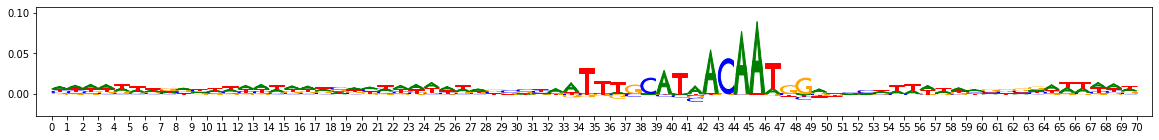

onehot, fwd and rev:


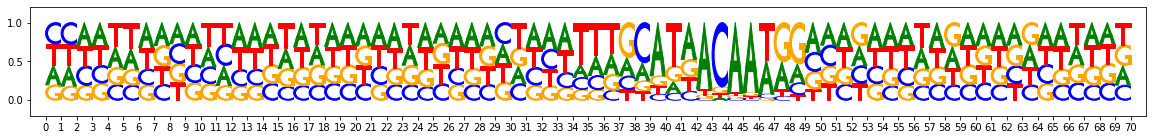

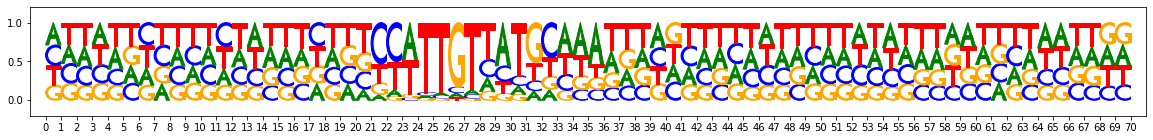

metacluster_0 pattern_2
total seqlets: 2932
Task 0 hypothetical scores:


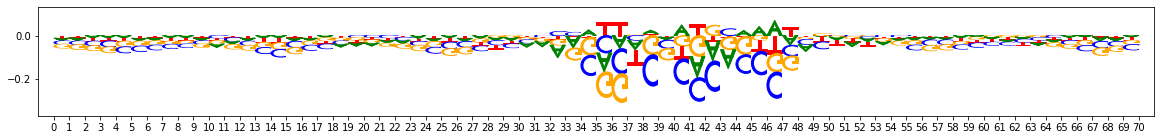

Task 0 actual importance scores:


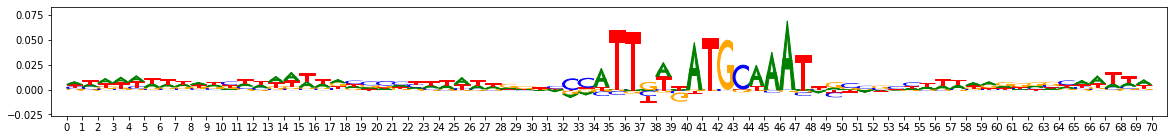

onehot, fwd and rev:


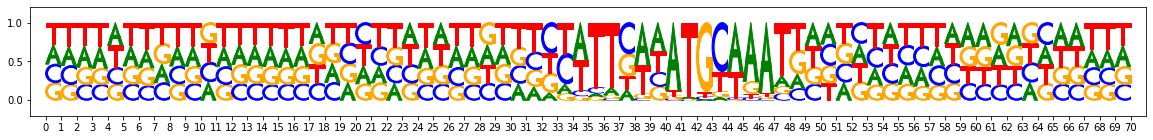

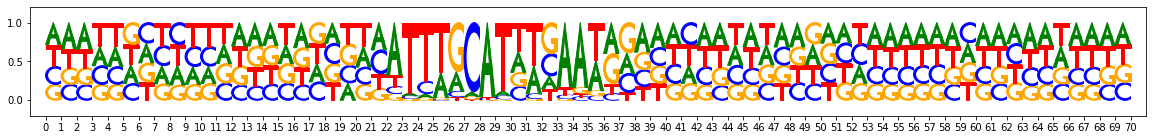

metacluster_0 pattern_3
total seqlets: 1549
Task 0 hypothetical scores:


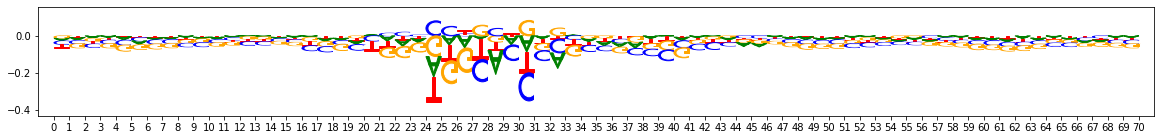

Task 0 actual importance scores:


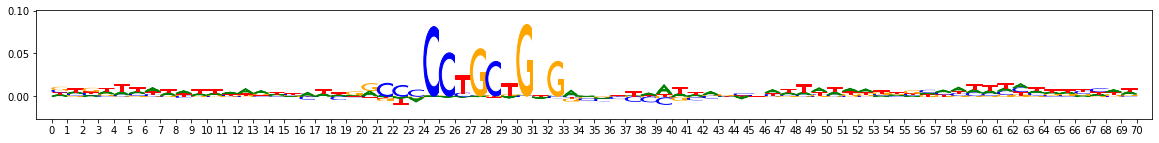

onehot, fwd and rev:


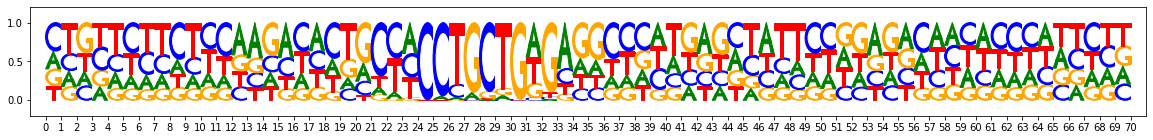

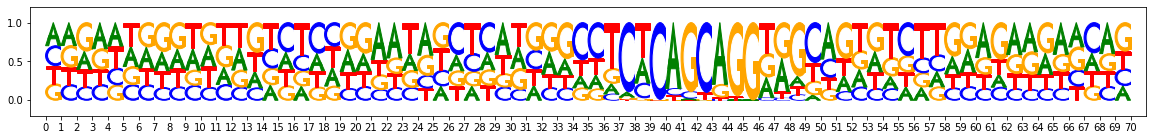

metacluster_0 pattern_4
total seqlets: 1093
Task 0 hypothetical scores:


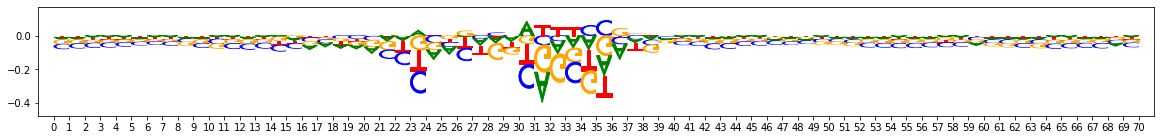

Task 0 actual importance scores:


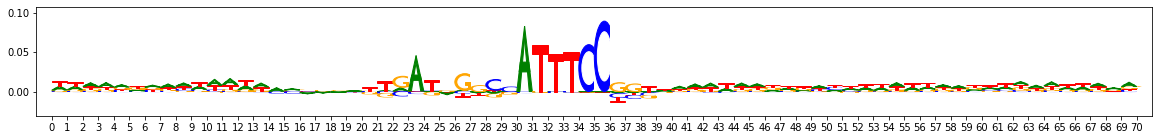

onehot, fwd and rev:


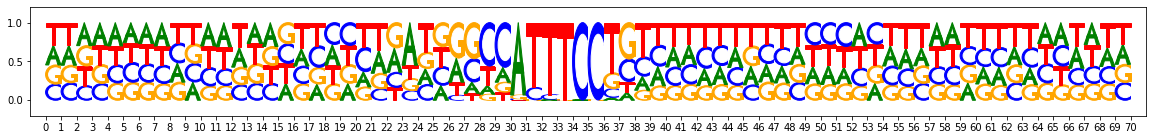

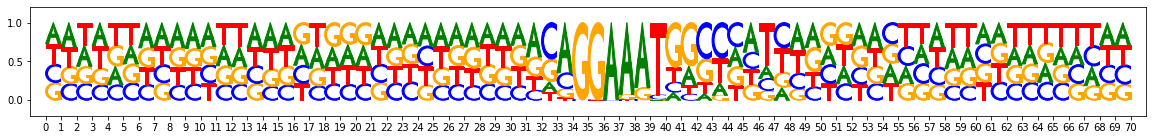

metacluster_0 pattern_5
total seqlets: 513
Task 0 hypothetical scores:


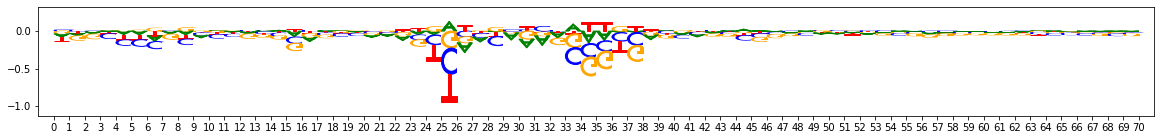

Task 0 actual importance scores:


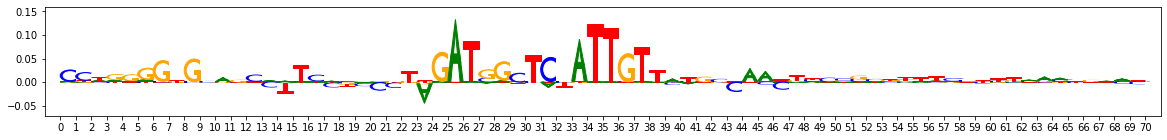

onehot, fwd and rev:


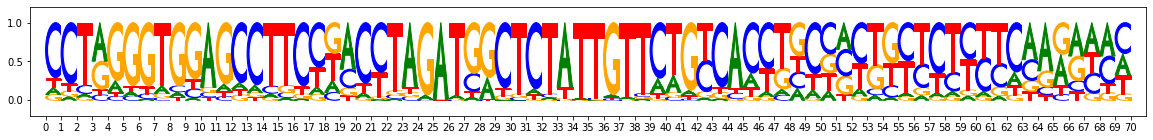

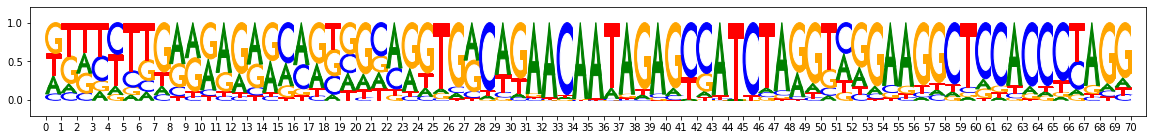

metacluster_0 pattern_6
total seqlets: 264
Task 0 hypothetical scores:


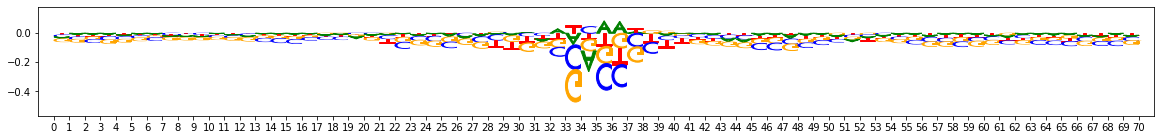

Task 0 actual importance scores:


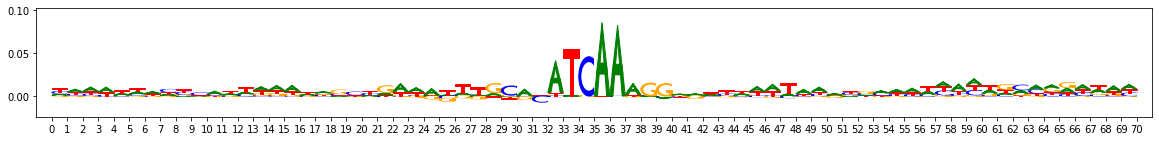

onehot, fwd and rev:


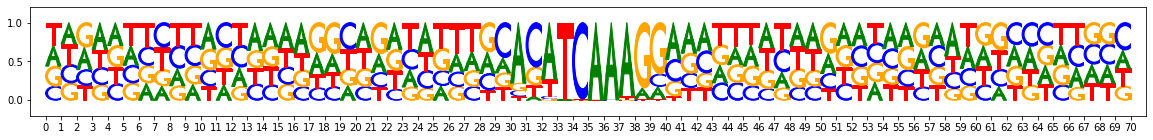

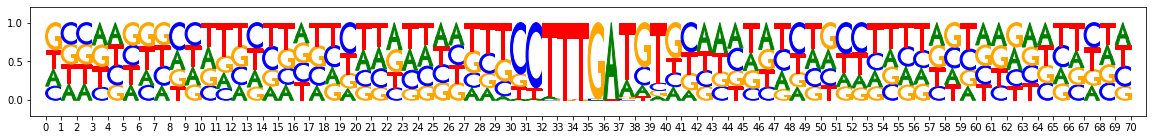

metacluster_0 pattern_7
total seqlets: 208
Task 0 hypothetical scores:


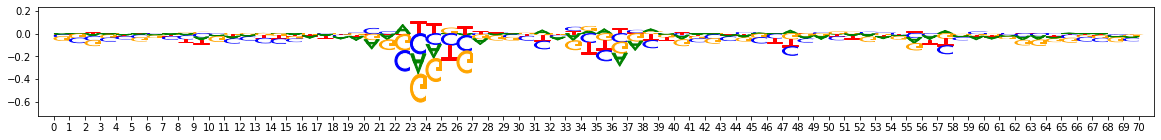

Task 0 actual importance scores:


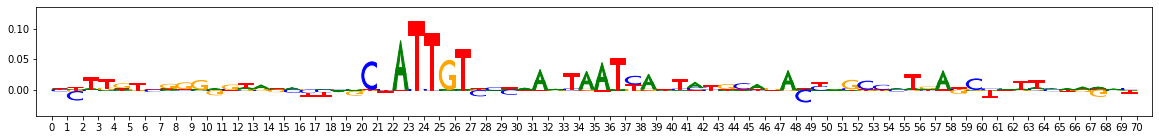

onehot, fwd and rev:


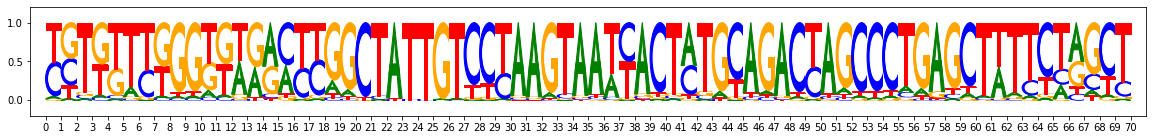

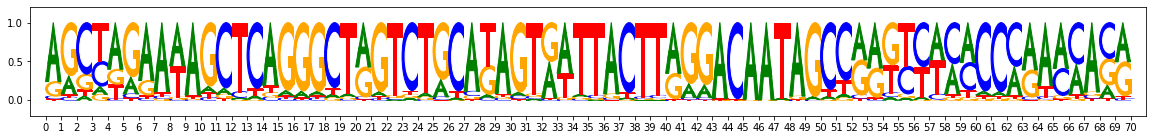

metacluster_0 pattern_8
total seqlets: 203
Task 0 hypothetical scores:


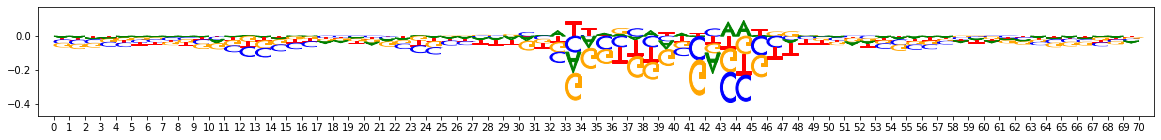

Task 0 actual importance scores:


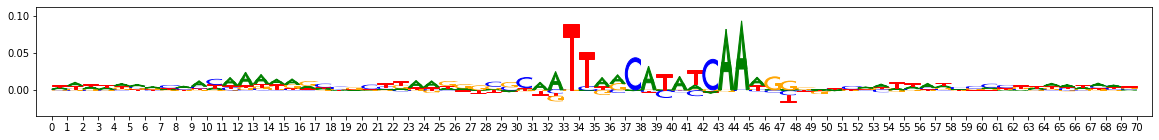

onehot, fwd and rev:


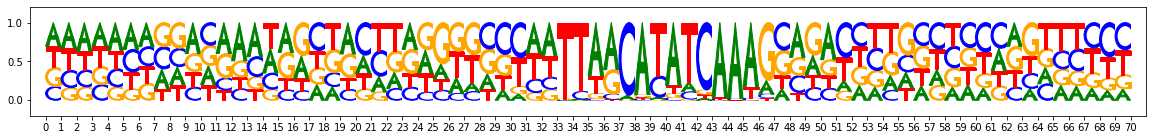

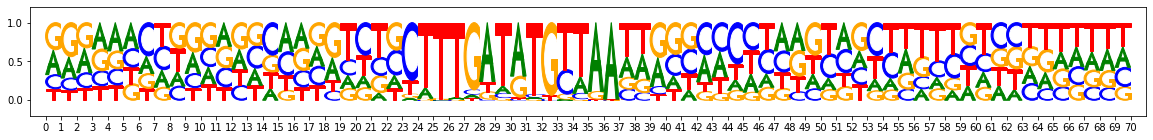

metacluster_0 pattern_9
total seqlets: 193
Task 0 hypothetical scores:


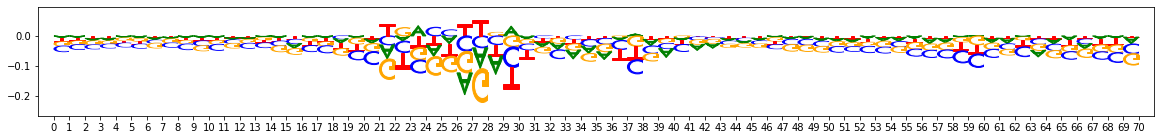

Task 0 actual importance scores:


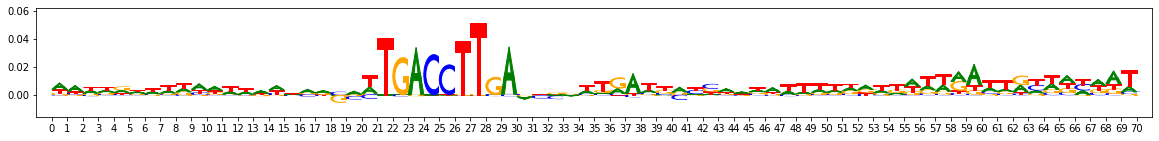

onehot, fwd and rev:


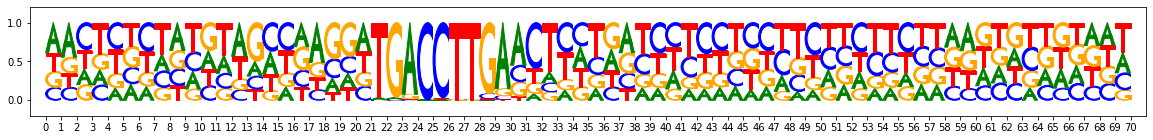

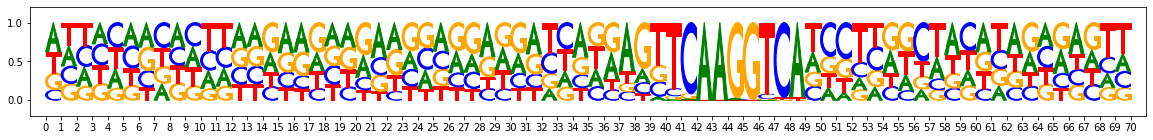

metacluster_0 pattern_10
total seqlets: 140
Task 0 hypothetical scores:


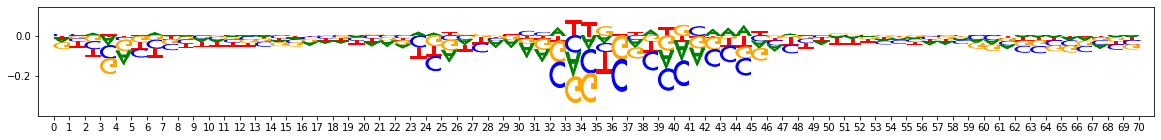

Task 0 actual importance scores:


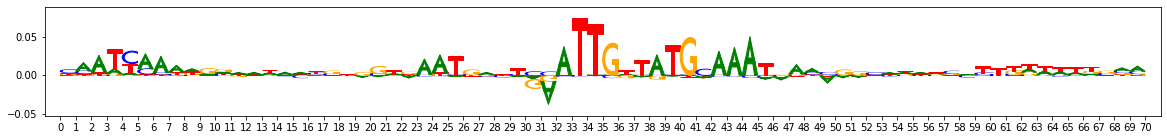

onehot, fwd and rev:


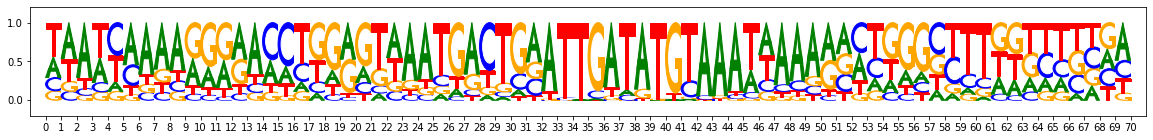

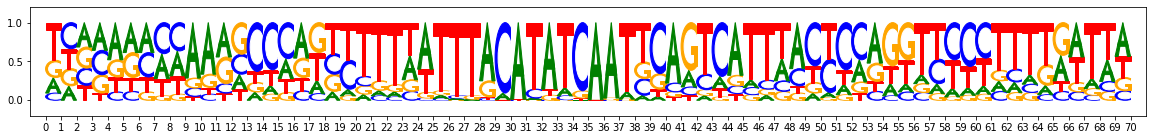

metacluster_0 pattern_11
total seqlets: 103
Task 0 hypothetical scores:


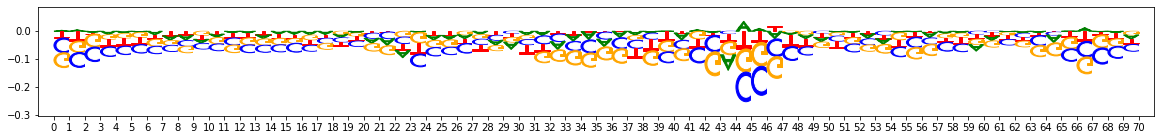

Task 0 actual importance scores:


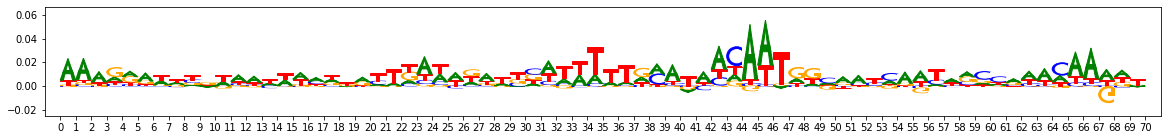

onehot, fwd and rev:


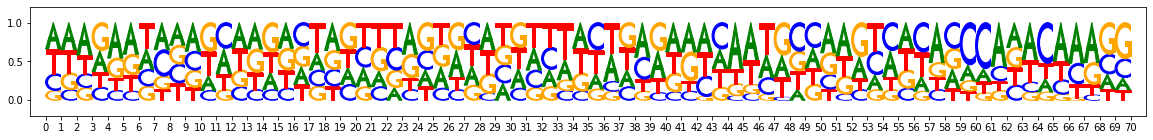

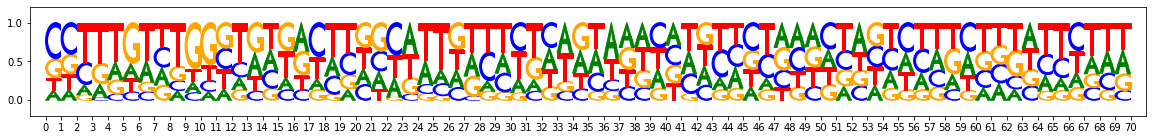

metacluster_0 pattern_12
total seqlets: 94
Task 0 hypothetical scores:


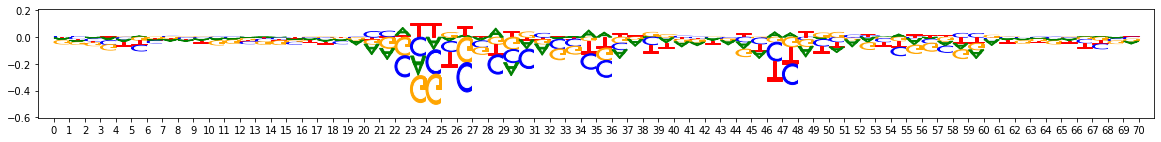

Task 0 actual importance scores:


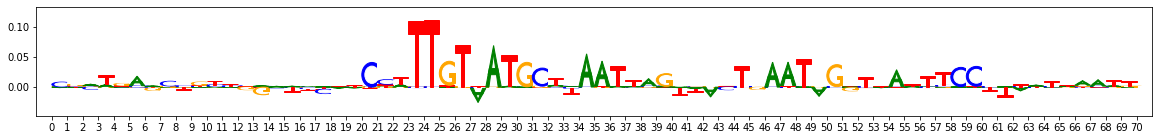

onehot, fwd and rev:


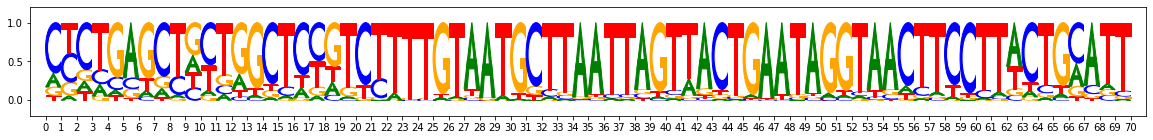

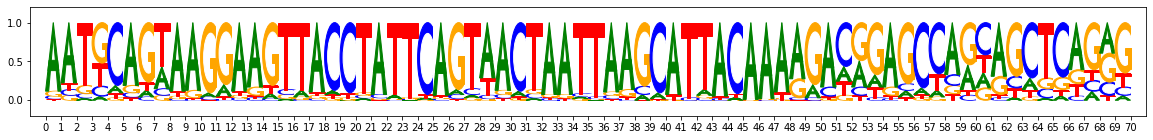

metacluster_0 pattern_13
total seqlets: 86
Task 0 hypothetical scores:


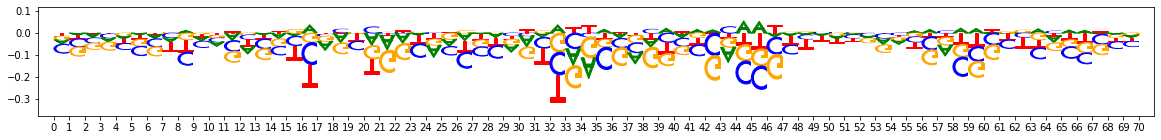

Task 0 actual importance scores:


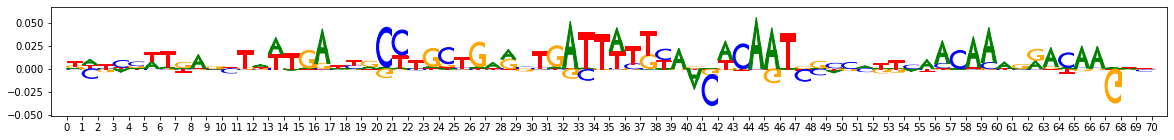

onehot, fwd and rev:


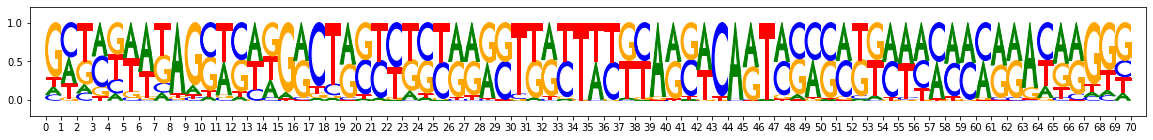

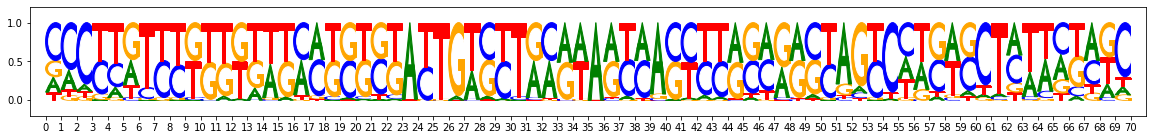

metacluster_0 pattern_14
total seqlets: 85
Task 0 hypothetical scores:


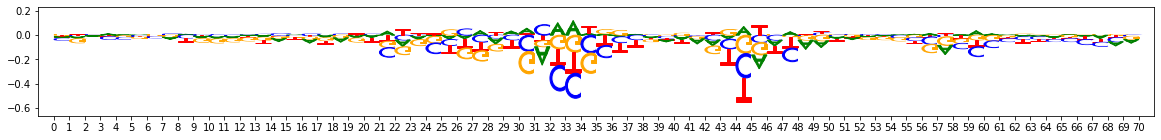

Task 0 actual importance scores:


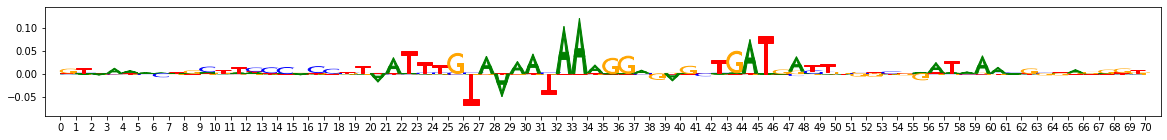

onehot, fwd and rev:


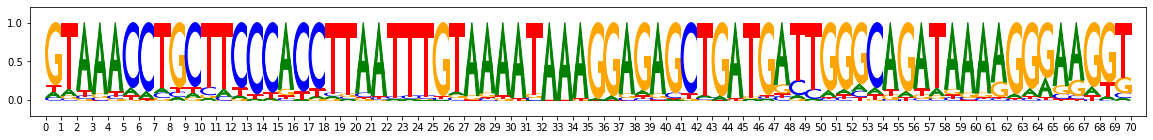

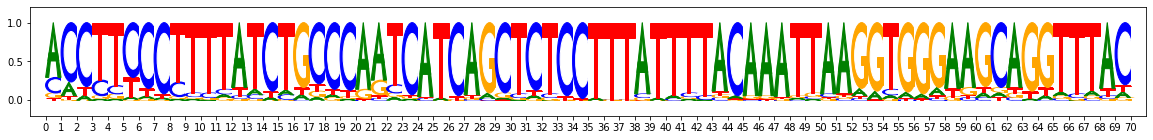

metacluster_0 pattern_15
total seqlets: 82
Task 0 hypothetical scores:


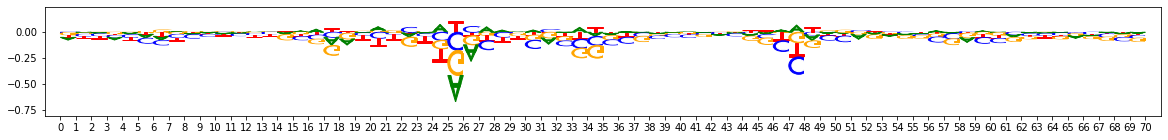

Task 0 actual importance scores:


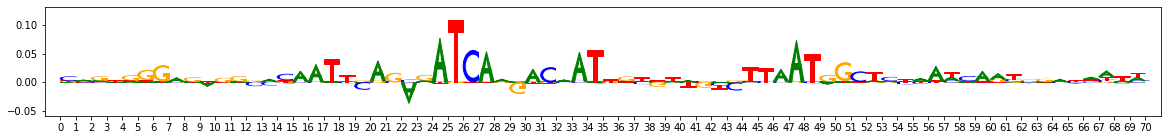

onehot, fwd and rev:


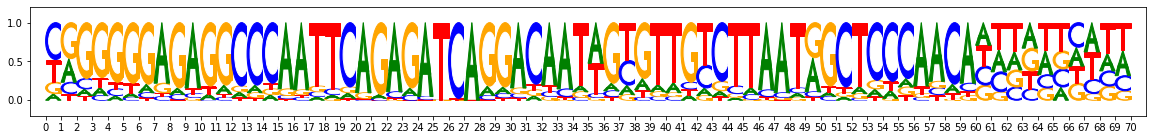

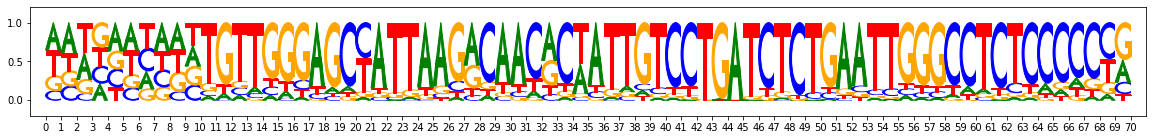

metacluster_0 pattern_16
total seqlets: 85
Task 0 hypothetical scores:


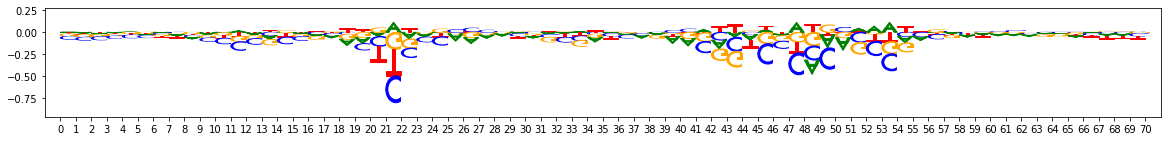

Task 0 actual importance scores:


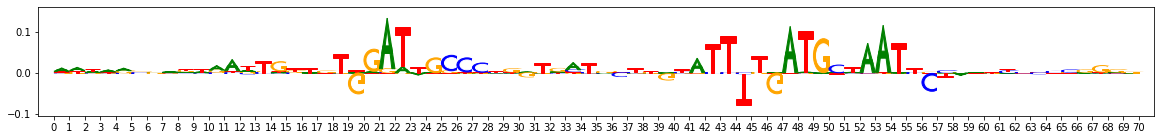

onehot, fwd and rev:


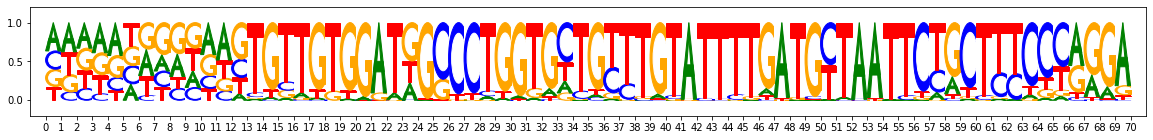

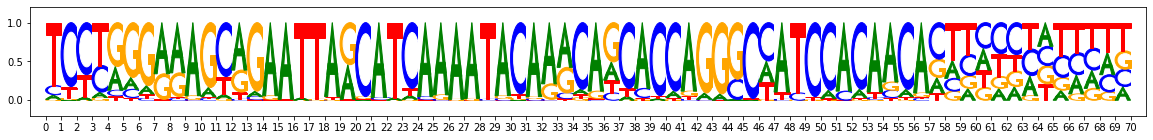

In [8]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File("commit0975f52_l6g2m0_results.hdf5","r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()